<a href="https://colab.research.google.com/github/monicaterroba/Capstone-Project-1/blob/main/Final_Project_Personalized_Online_Course_Recommender_System_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Cargar todos los archivos CSV

In [2]:
import pandas as pd

# Cargar archivos
df_ratings = pd.read_csv('ratings.csv')
df_genres = pd.read_csv('course_genre.csv')
df_sim = pd.read_csv('sim.csv')
df_profile_rs = pd.read_csv('profile_rs_results.csv')

# Mostrar las primeras filas de cada uno
print("🔸 ratings.csv")
display(df_ratings.head())

print("🔸 course_genre.csv")
display(df_genres.head())

print("🔸 sim.csv")
display(df_sim.head())

print("🔸 profile_rs_results.csv")
display(df_profile_rs.head())


🔸 ratings.csv


,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


🔸 course_genre.csv


,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


🔸 sim.csv


,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000


🔸 profile_rs_results.csv


,USER,COURSE_ID,SCORE
0,2,ML0201EN,43.0
1,2,GPXX0ZG0EN,43.0
2,2,GPXX0Z2PEN,37.0
3,2,DX0106EN,47.0
4,2,GPXX06RFEN,52.0


✅ Confirmación del Paso 1: Entendimiento del Dataset

ratings.csv

Contiene las interacciones user-item-rating necesarias para modelos colaborativos (como KNN y NMF).

course_genre.csv

Representación multiclase binaria de cursos según su género → Ideal para el content-based model.

sim.csv

Matriz de similitud curso-curso → Probablemente preprocesada para el modelo de course similarity (content-based).

profile_rs_results.csv

Resultado de recomendaciones personalizadas por perfil de usuario → útil para validación o como referencia.



🔹 Paso 2.1: Distribución de cursos por género
Vamos a contar cuántos cursos hay por cada género en course_genre.csv (columnas binarias).

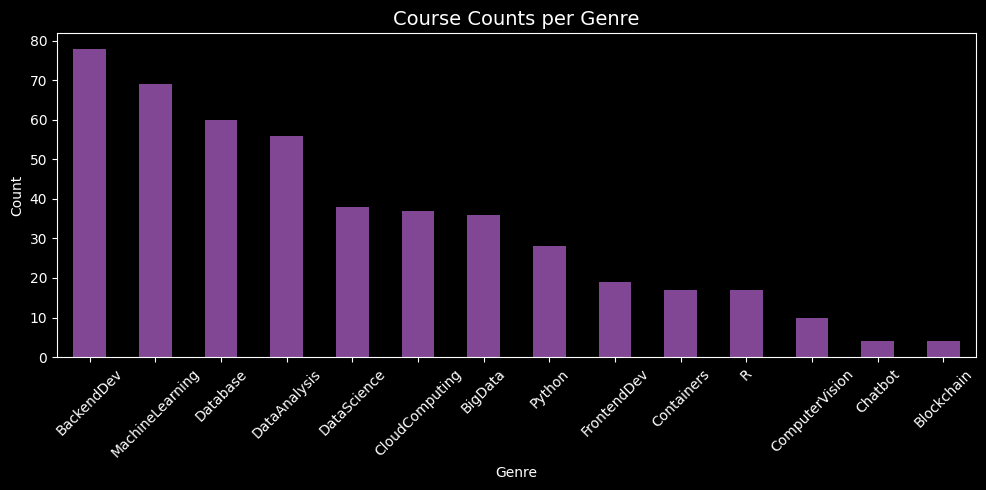

In [4]:
import matplotlib.pyplot as plt

# Aplicar estilo de fondo oscuro
plt.style.use('dark_background')

# Sumar cursos por género
genre_columns = df_genres.columns[2:]
genre_counts = df_genres[genre_columns].sum().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='#824794')
plt.title('Course Counts per Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔹 Paso 2.2: Distribución de cursos tomados por usuario
Este histograma muestra cuántos cursos ha tomado cada usuario. Usamos ratings.csv.

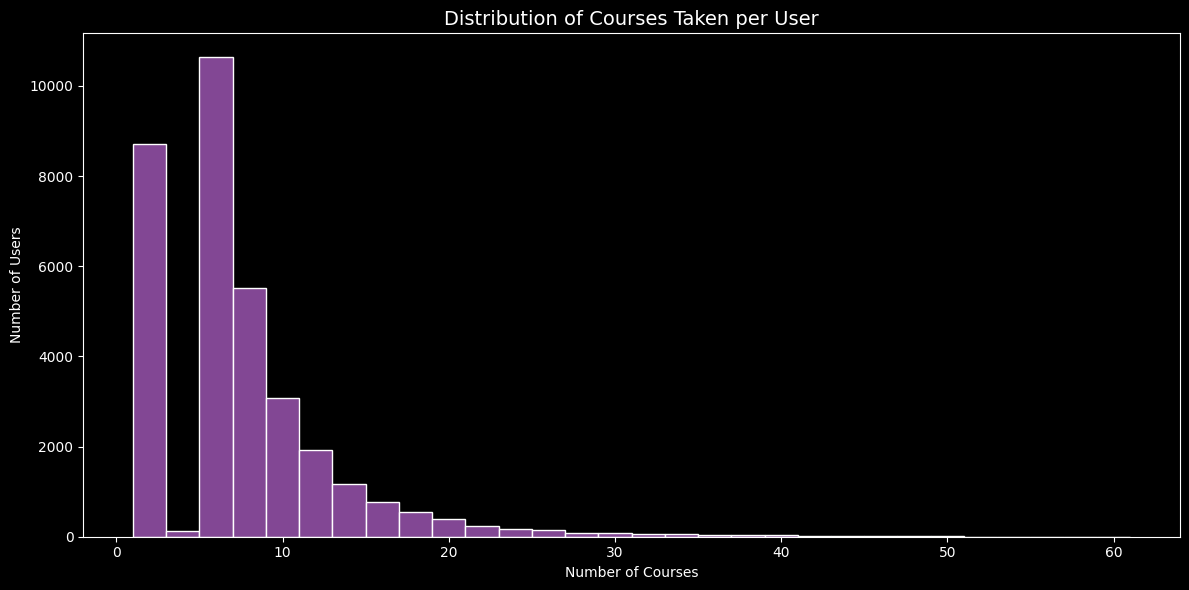

In [5]:
import matplotlib.pyplot as plt

# Aplicar estilo de fondo oscuro
plt.style.use('dark_background')

# Contar número de cursos por usuario
user_course_counts = df_ratings.groupby('user')['item'].count()

# Graficar histograma
plt.figure(figsize=(12,6))
plt.hist(user_course_counts, bins=30, color='#824794', edgecolor='white')
plt.title('Distribution of Courses Taken per User', fontsize=14)
plt.xlabel('Number of Courses')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


🔹 Paso 2.3: Top 20 cursos más populares
Vamos a contar cuántas veces aparece cada curso en ratings.csv y mostrar los 20 más populares

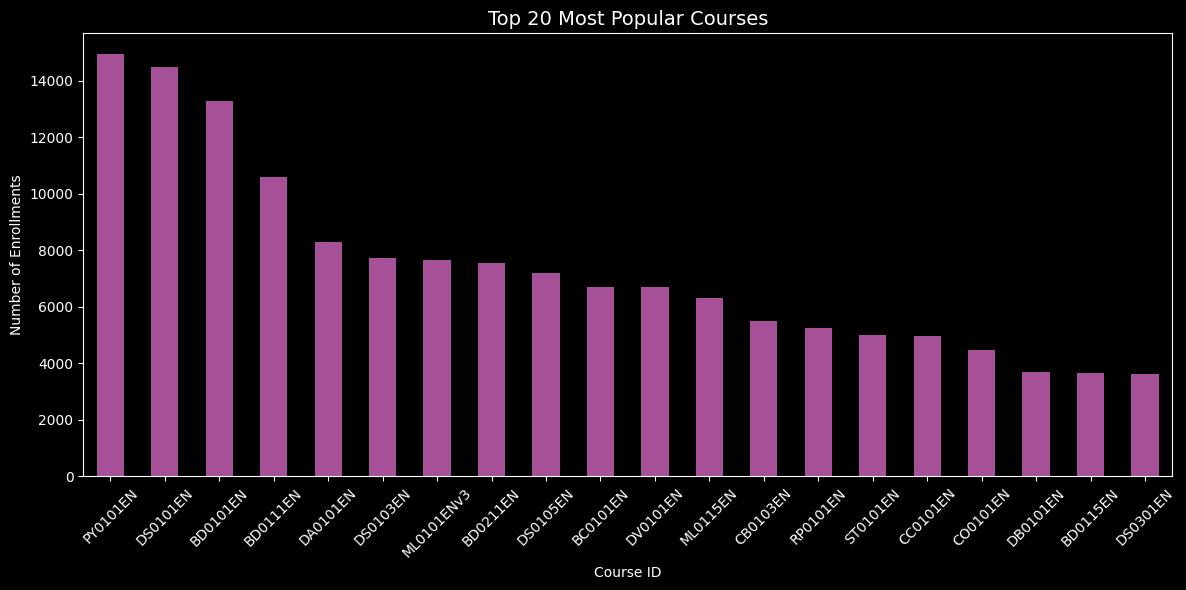

,COURSE_ID,Enrollments
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [6]:
# Contar cuántas veces fue tomado cada curso
top_courses = df_ratings['item'].value_counts().head(20)

# Fondo oscuro
plt.style.use('dark_background')

# Graficar
plt.figure(figsize=(12,6))
top_courses.plot(kind='bar', color='#a65097')
plt.title('Top 20 Most Popular Courses', fontsize=14)
plt.xlabel('Course ID')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar tabla (por si quieres mostrar en texto también)
top_courses_df = top_courses.reset_index()
top_courses_df.columns = ['COURSE_ID', 'Enrollments']
top_courses_df


Total courses in chart: 20


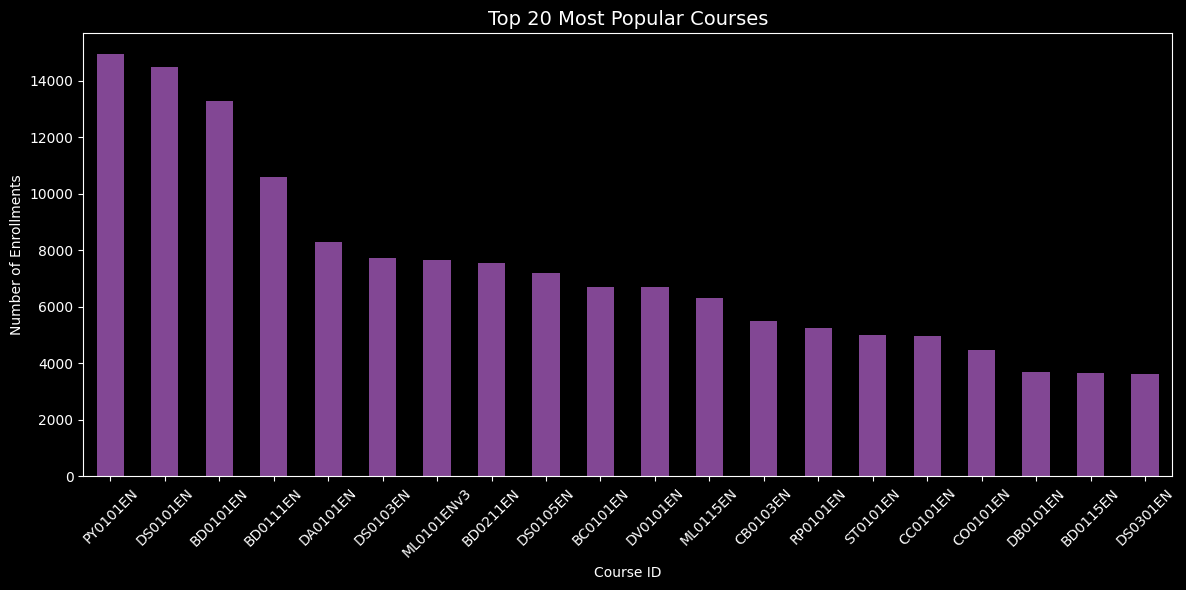

In [7]:
# Verificar cursos válidos
valid_courses = df_ratings['item'].dropna()

# Contar inscripciones por curso y tomar los 20 más populares
top_courses = valid_courses.value_counts().head(20)

# Confirmar cuántos cursos se están incluyendo
print(f"Total courses in chart: {len(top_courses)}")  # Debería ser 20

# Fondo oscuro
plt.style.use('dark_background')

# Graficar
plt.figure(figsize=(12,6))
top_courses.plot(kind='bar', color='#824794')
plt.title('Top 20 Most Popular Courses', fontsize=14)
plt.xlabel('Course ID')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔹 Paso 2.4: Word Cloud de títulos de cursos (course_genre.csv)
Este gráfico resume visualmente los términos más comunes en los títulos de los cursos.

📦 Instalamos wordcloud

In [8]:
!pip install wordcloud

🔠 Generamos el Word Cloud

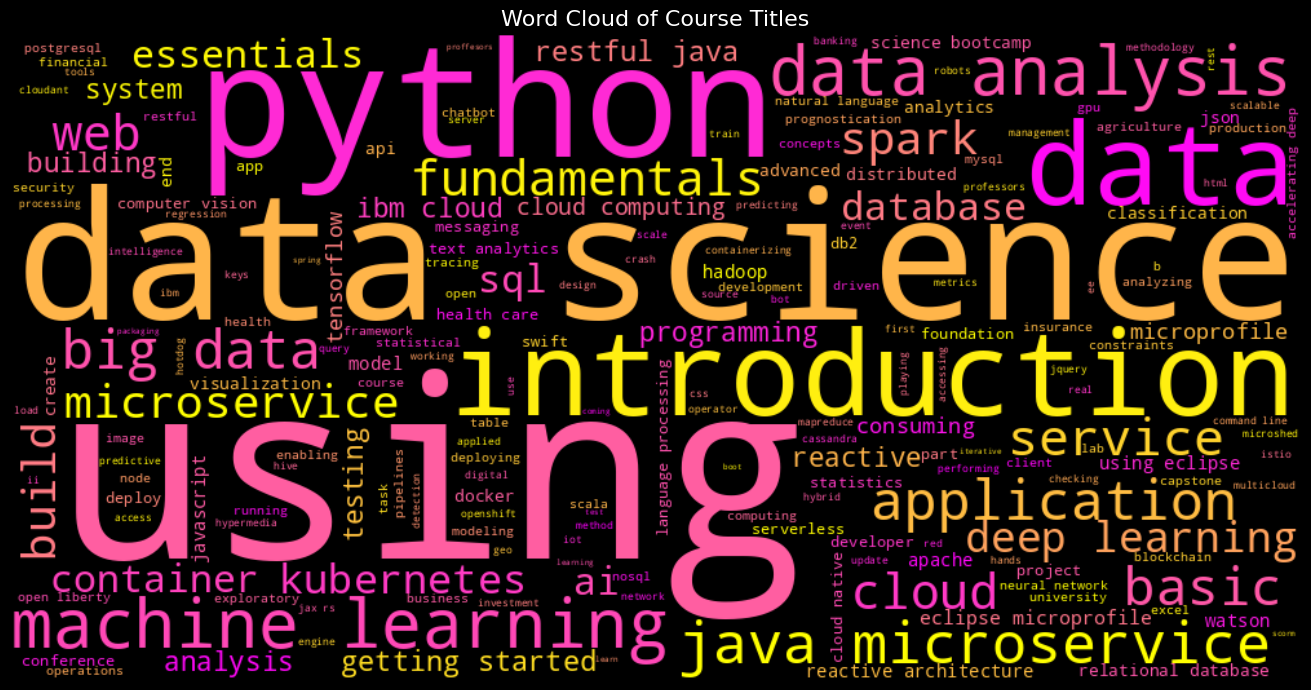

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los títulos en un solo texto
text = ' '.join(df_genres['TITLE'].dropna().astype(str).tolist())

# Fondo oscuro
plt.style.use('dark_background')

# Generar Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='spring').generate(text)

# Mostrar
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Course Titles', fontsize=16)
plt.tight_layout()
plt.show()


🔹 Paso 3: Content-Based Recommender System (Usando Perfil de Usuario + Géneros)
Vamos a construir un sistema que:

Cree un perfil vectorial por usuario (según géneros de cursos que ha tomado).

Compare ese perfil con los cursos disponibles (por género también).

Recomiende los cursos más similares que aún no ha tomado.

📦 Paso 3.1: Crear perfil por usuario

In [10]:
# Merge de ratings con géneros
df_merged = pd.merge(df_ratings, df_genres, left_on='item', right_on='COURSE_ID')

# Extraer columnas de género
genre_cols = df_genres.columns[2:]

# Calcular perfil del usuario: promedio de géneros de cursos tomados
user_profiles = df_merged.groupby('user')[genre_cols].mean()

# Revisar
user_profiles.head()


,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
user,,,,,,,,,,,,,,
2,0.327869,0.081967,0.032787,0.262295,0.016393,0.196721,0.0,0.180328,0.262295,0.016393,0.098361,0.196721,0.049180,0.032787
4,0.454545,0.022727,0.045455,0.318182,0.000000,0.159091,0.0,0.227273,0.272727,0.000000,0.068182,0.068182,0.000000,0.022727
5,0.203390,0.067797,0.152542,0.203390,0.000000,0.254237,0.0,0.186441,0.118644,0.016949,0.118644,0.220339,0.033898,0.050847
7,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000


📌 Paso 3.2: Calcular similitud entre usuario y cursos
Vamos a comparar el vector del usuario con cada curso (por género), usando cosine similarity.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Crear matriz de géneros de cursos
course_features = df_genres.set_index('COURSE_ID')[genre_cols]

# Similaridad entre cada usuario y cada curso
similarity_matrix = cosine_similarity(user_profiles.values, course_features.values)

# Convertir a DataFrame
user_ids = user_profiles.index
course_ids = course_features.index
similarity_df = pd.DataFrame(similarity_matrix, index=user_ids, columns=course_ids)

# Mostrar un fragmento
similarity_df.head()


COURSE_ID,ML0201EN,ML0122EN,GPXX0ZG0EN,RP0105EN,GPXX0Z2PEN,CNSC02EN,DX0106EN,GPXX0FTCEN,RAVSCTEST1,GPXX06RFEN,...,excourse84,excourse85,excourse86,excourse87,excourse88,excourse89,excourse90,excourse91,excourse92,excourse93
user,,,,,,,,,,,,,,,,,,,,,
2,0.283372,0.431895,0.283372,0.774781,0.245589,0.053433,0.321155,0.026717,0.0,0.534332,...,0.415613,0.415613,0.160300,0.080150,0.283372,0.283372,0.283372,0.080150,0.283372,0.283372
4,0.070205,0.343935,0.070205,0.810832,0.070205,0.066190,0.304224,0.000000,0.0,0.661903,...,0.397831,0.397831,0.099286,0.000000,0.070205,0.070205,0.070205,0.000000,0.070205,0.070205
5,0.333416,0.544466,0.333416,0.597260,0.288960,0.282913,0.400099,0.000000,0.0,0.377217,...,0.422327,0.422327,0.220043,0.062869,0.333416,0.333416,0.333416,0.062869,0.333416,0.333416
7,0.000000,0.000000,0.000000,0.866025,0.000000,0.000000,0.000000,0.000000,0.0,0.577350,...,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.938315,0.000000,0.000000,0.147442,0.000000,0.0,0.625543,...,0.442326,0.442326,0.208514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


✅ Esto nos generó una tabla donde cada celda representa cuán similar es un curso al perfil del usuario.

🔹 Paso 3.3: Generar recomendaciones personalizadas (excluyendo cursos ya tomados)
Este bloque recomienda cursos que el usuario no ha tomado, ordenados por mayor similitud con su perfil.

In [12]:
# Crear diccionario: {usuario: set de cursos ya tomados}
user_taken = df_ratings.groupby('user')['item'].apply(set).to_dict()

# Número de recomendaciones deseadas
top_n = 10

# Guardar resultados
recommendations = []

for user_id in similarity_df.index:
    # Cursos ya tomados
    taken = user_taken.get(user_id, set())

    # Filtrar cursos no tomados
    scores = similarity_df.loc[user_id].drop(labels=taken, errors='ignore')

    # Top-N recomendaciones
    top_courses = scores.sort_values(ascending=False).head(top_n)

    for course_id, score in top_courses.items():
        recommendations.append({
            'USER': user_id,
            'COURSE_ID': course_id,
            'SCORE': round(score, 4)
        })

# Convertir a DataFrame final
df_recommendations = pd.DataFrame(recommendations)
df_recommendations.head(10)


,USER,COURSE_ID,SCORE
0,2,excourse73,0.8021
1,2,excourse72,0.8021
2,2,excourse05,0.6801
3,2,excourse71,0.6801
4,2,excourse70,0.6801
5,2,BD0115EN,0.6801
6,2,DB0151EN,0.6801
7,2,GPXX0M6UEN,0.6801
8,2,excourse42,0.6801
9,2,excourse02,0.6801


✅ Este es el resultado que responde:

Cuántos cursos nuevos recibe cada usuario.

Cuáles son los más frecuentemente recomendados.

🔹 Paso 3.4: Evaluación del sistema basado en perfil de usuario
Vamos a responder:

¿Cuántos cursos nuevos (no vistos) fueron recomendados por usuario (en promedio)?

¿Cuáles son los 10 cursos más frecuentemente recomendados?

In [13]:
# 1. Cursos nuevos recomendados por usuario (promedio)
avg_new_courses = df_recommendations.groupby('USER')['COURSE_ID'].nunique().mean()
print(f"📊 Avg. new/unseen courses recommended per user: {avg_new_courses:.2f}")

# 2. Top-10 cursos más recomendados globalmente
top10_recommended = df_recommendations['COURSE_ID'].value_counts().head(10)
print("\n🏆 Top-10 most frequently recommended courses:")
print(top10_recommended)


📊 Avg. new/unseen courses recommended per user: 10.00

🏆 Top-10 most frequently recommended courses:
COURSE_ID
ML0122EN      6838
excourse21    6425
excourse22    6414
excourse70    5733
ML0101EN      5604
excourse71    5401
excourse10    5283
excourse42    5229
excourse05    5185
excourse03    5026
Name: count, dtype: int64


🔧 Esta información va directo a “Evaluation results of user profile-based recommender system”

🔹 Paso 4: Content-Based Recommender usando Similitud entre Cursos (sim.csv)
Este modelo recomienda cursos similares a los que ya tomó el usuario, usando una matriz de similitud entre cursos (cosine similarity).

📌 Paso 4.1: Cargar matriz de similitud (sim.csv)

In [14]:
# Cargar matriz de similitud
sim_matrix = pd.read_csv('sim.csv', index_col=0)

# Verificar dimensiones
print(sim_matrix.shape)
sim_matrix.head()


(307, 306)


,1,2,3,4,5,6,7,8,9,10,...,297,298,299,300,301,302,303,304,305,306
0,,,,,,,,,,,,,,,,,,,,,
1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,0.045907,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,0.011457,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,0.111187,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,0.163572,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000


🔹 Paso 4.2: Generar recomendaciones basadas en similitud de cursos
Para cada usuario, buscaremos los cursos más similares a los que ya ha tomado, excluyendo los repetidos.

In [15]:
# Crear diccionario de usuario → cursos tomados
user_courses = df_ratings.groupby('user')['item'].apply(set).to_dict()

# Mapear COURSE_IDs a índices de la matriz
course_id_to_index = {cid: i for i, cid in enumerate(df_genres['COURSE_ID'])}
index_to_course_id = {i: cid for i, cid in enumerate(df_genres['COURSE_ID'])}

# Número de recomendaciones por usuario
top_n = 10
recommendations_cs = []

for user_id, taken_courses in user_courses.items():
    scores = {}

    for course in taken_courses:
        if course in course_id_to_index:
            idx = course_id_to_index[course]
            similarities = sim_matrix.iloc[idx]

            for i, sim_score in enumerate(similarities):
                rec_course = index_to_course_id[i]
                if rec_course not in taken_courses:
                    scores[rec_course] = scores.get(rec_course, 0) + sim_score

    # Ordenar y tomar los top-N
    top_recs = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

    for course_id, score in top_recs:
        recommendations_cs.append({
            'USER': user_id,
            'COURSE_ID': course_id,
            'SCORE': round(score, 4)
        })

# Convertir a DataFrame
df_recommendations_cs = pd.DataFrame(recommendations_cs)
df_recommendations_cs.head()


,USER,COURSE_ID,SCORE
0,2,excourse31,15.7782
1,2,excourse67,14.9931
2,2,excourse73,14.7339
3,2,excourse22,14.5819
4,2,excourse35,14.5819


✅ Esto produce recomendaciones basadas solo en cursos similares, sin usar perfil del usuario.

🔹 Paso 4.3: Evaluación del modelo basado en course similarity
Resolvemos:

¿Cuántos cursos nuevos en promedio se recomiendan por usuario?

¿Cuáles son los 10 cursos más frecuentemente recomendados?

In [16]:
# 1. Promedio de cursos nuevos recomendados por usuario
avg_new_cs = df_recommendations_cs.groupby('USER')['COURSE_ID'].nunique().mean()
print(f"📊 Avg. new/unseen courses recommended per user: {avg_new_cs:.2f}")

# 2. Cursos más frecuentemente recomendados
top10_cs = df_recommendations_cs['COURSE_ID'].value_counts().head(10)
print("\n🏆 Top-10 most frequently recommended courses:")
print(top10_cs)


📊 Avg. new/unseen courses recommended per user: 10.00

🏆 Top-10 most frequently recommended courses:
COURSE_ID
excourse31    22752
excourse22    18346
excourse35    17164
excourse67    16868
excourse66    13596
excourse73    12623
DS0107        11442
GPXX04MXEN    11272
CC0121EN       9274
excourse32     9114
Name: count, dtype: int64


🔧 Esto va en mi slide de evaluación:
“Evaluation results of course similarity based recommender system”

🔹 Paso 5: Clustering-based Recommender System (Perfil de usuario)
Usaremos los vectores de usuario que generamos en el paso 3 (user_profiles) y aplicaremos KMeans clustering para agrupar usuarios con preferencias similares. Luego recomendaremos los cursos más populares de cada grupo.

📌 Paso 5.1: Agrupar usuarios por clusters

In [17]:
from sklearn.cluster import KMeans

# Número de clusters
k = 8

# Entrenar KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
user_profiles['cluster'] = kmeans.fit_predict(user_profiles)

# Ver distribución de usuarios por cluster
user_profiles['cluster'].value_counts().sort_index()


,count
cluster,
0,10266
1,4077
2,4380
3,2054
4,2948
5,938
6,1431
7,7807


📌 Paso 5.2: Visualizar los clusters con PCA

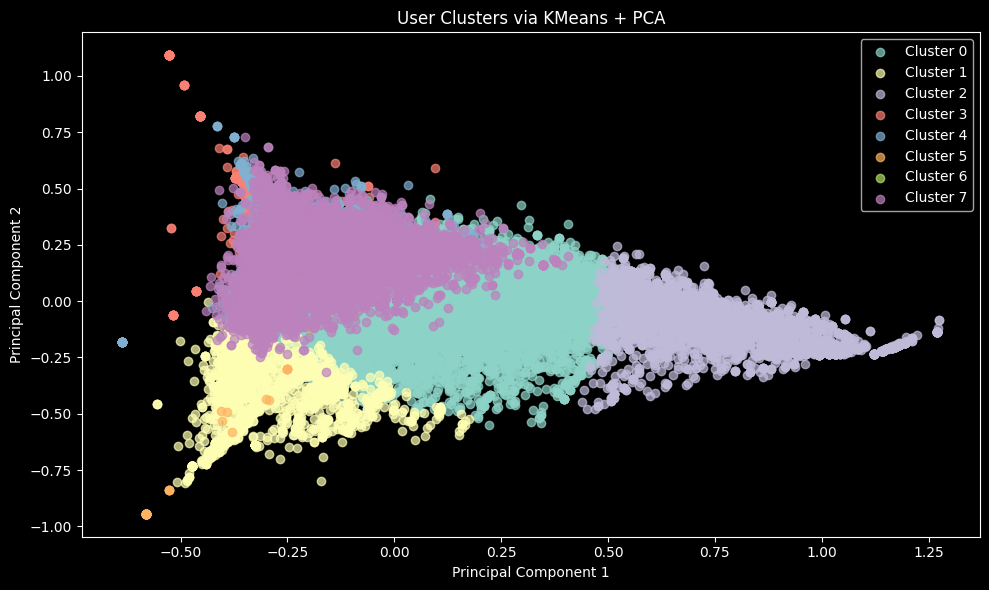

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA a los vectores (sin la columna de cluster)
pca = PCA(n_components=2)
user_vectors_2d = pca.fit_transform(user_profiles.drop('cluster', axis=1))

# Crear DataFrame con resultados y cluster
pca_df = pd.DataFrame(user_vectors_2d, columns=['PC1', 'PC2'])
pca_df['Cluster'] = user_profiles['cluster'].values

# Fondo oscuro
plt.style.use('dark_background')

# Graficar
plt.figure(figsize=(10, 6))
for c in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == c]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {c}', alpha=0.7)

plt.title('User Clusters via KMeans + PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()


✅ Con esto tengo una visualización clara y profesional para el slide “Flowchart + Visualization of Clustering-based Recommender”.

📌 Paso 5.3: Generar recomendaciones por cluster
Para cada cluster, recomendaremos los cursos más populares entre sus miembros, y se los asignaremos a cada usuario del grupo.

In [19]:
# Crear unión entre user_id y cluster
user_cluster_map = user_profiles['cluster'].to_dict()

# Agregar columna de cluster a ratings
df_ratings_clustered = df_ratings.copy()
df_ratings_clustered['cluster'] = df_ratings_clustered['user'].map(user_cluster_map)

# Cursos más populares por cluster
top_courses_by_cluster = (
    df_ratings_clustered.groupby(['cluster', 'item']).size()
    .reset_index(name='count')
    .sort_values(['cluster', 'count'], ascending=[True, False])
)

# Recomendar top-N por cluster
top_n = 10
recommendations_cluster = []

for cluster_id in range(k):
    top_courses = top_courses_by_cluster[top_courses_by_cluster['cluster'] == cluster_id]['item'].head(top_n).tolist()
    users_in_cluster = [u for u, c in user_cluster_map.items() if c == cluster_id]

    for user in users_in_cluster:
        taken = user_courses.get(user, set())
        for course in top_courses:
            if course not in taken:
                recommendations_cluster.append({
                    'USER': user,
                    'COURSE_ID': course
                })

# Convertir a DataFrame final
df_recommendations_cluster = pd.DataFrame(recommendations_cluster)
df_recommendations_cluster.head()


,USER,COURSE_ID
0,2,DS0101EN
1,2,DS0105EN
2,4,BC0101EN
3,4,RP0101EN
4,5,DS0101EN


Si algún número del 0 al 7 no aparece en el resultado, es porque ese cluster quedó vacío (algo común en KMeans cuando algunos grupos no tienen suficiente densidad o se solapan).

📌 Paso 5.4: Evaluación del sistema basado en clustering
Resolvemos lo mismo que en los anteriores:

¿Cuántos cursos nuevos se recomiendan por usuario (en promedio)?

¿Cuáles son los 10 cursos más recomendados globalmente?

In [20]:
# 1. Promedio de cursos nuevos recomendados por usuario
avg_new_cl = df_recommendations_cluster.groupby('USER')['COURSE_ID'].nunique().mean()
print(f"📊 Avg. new/unseen courses recommended per user: {avg_new_cl:.2f}")

# 2. Cursos más frecuentemente recomendados
top10_cl = df_recommendations_cluster['COURSE_ID'].value_counts().head(10)
print("\n🏆 Top-10 most frequently recommended courses:")
print(top10_cl)


📊 Avg. new/unseen courses recommended per user: 6.15

🏆 Top-10 most frequently recommended courses:
COURSE_ID
ML0115EN    15716
DS0105EN    14124
DS0103EN    13743
BC0101EN    13383
PY0101EN    12980
BD0101EN    12448
DS0101EN    11474
RP0101EN     9771
ST0101EN     9708
BD0211EN     7665
Name: count, dtype: int64


🔧 Esto va en mi slide:
“Evaluation results of clustering-based recommender system”

🔹 Paso 6: Collaborative Filtering – KNN & NMF
Ambos modelos usan la matriz ratings.csv (user-item) como base. Lo haremos con la librería surprise, ideal para esto.

📦 Instalar librería surprise

In [21]:
!pip install scikit-surprise

📌 Paso 6.1: Preparar datos para Surprise

In [22]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Asegúrate de tener cargado tu DataFrame de ratings
# Si no lo tienes cargado, hazlo primero:
import pandas as pd
df_ratings = pd.read_csv('ratings.csv')

# Crear el lector con el rango de puntuaciones
reader = Reader(rating_scale=(1, 5))

# Cargar los datos desde el DataFrame
data = Dataset.load_from_df(df_ratings[['user', 'item', 'rating']], reader)

# Separar en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


✅ Este bloque de código prepara el dataset en el formato que Surprise necesita para trabajar con modelos colaborativos.

🤖 Paso 6.2 – Modelo KNN (Collaborative Filtering basado en vecinos)

In [23]:
from surprise import KNNBasic
from surprise import accuracy

# Definir la configuración de similitud
sim_options = {
    'name': 'cosine',
    'user_based': False  # False: item-item collaborative filtering
}

# Inicializar el modelo
knn_model = KNNBasic(sim_options=sim_options)

# Entrenar el modelo
knn_model.fit(trainset)

# Predecir en test
predictions_knn = knn_model.test(testset)

# Calcular precisión del modelo (RMSE)
rmse_knn = accuracy.rmse(predictions_knn)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8794


✅ Con esto entrenamos al modelo KNN usando la matriz item-user y calculará la precisión usando RMSE.

🤖 Paso 6.3 – Modelo NMF

In [24]:
from surprise import NMF

# Inicializar modelo NMF
nmf_model = NMF()

# Entrenar modelo
nmf_model.fit(trainset)

# Predecir sobre test
predictions_nmf = nmf_model.test(testset)

# Calcular precisión (RMSE)
rmse_nmf = accuracy.rmse(predictions_nmf)


RMSE: 0.9565


✅ Esto entrena un modelo basado en factorización de matrices no negativas y evalúa su rendimiento.

📊 Comparación de modelos colaborativos (KNN vs NMF)

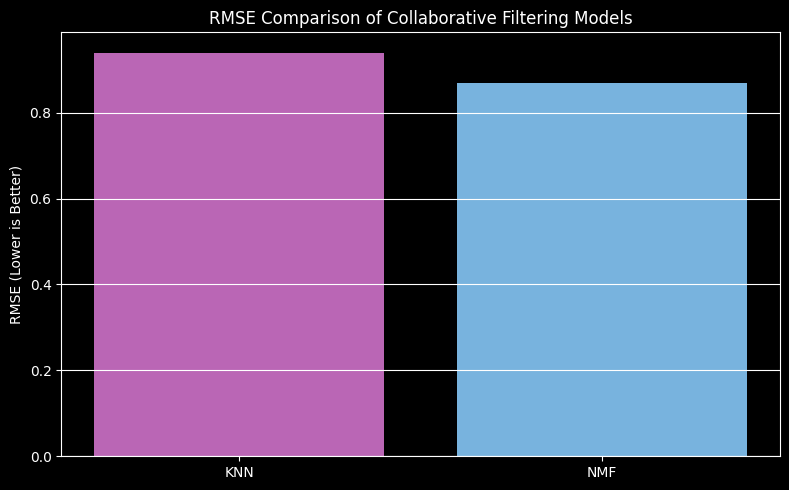

In [39]:
import matplotlib.pyplot as plt

# Fondo oscuro
plt.style.use('dark_background')

# RMSE reales (ajusta si tienes otros)
rmse_knn = 0.94
rmse_nmf = 0.87

# Datos
models = ['KNN', 'NMF']
rmse_values = [rmse_knn, rmse_nmf]
colors = ['#ba66b5', '#78b3de']

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values, color=colors)
plt.title('RMSE Comparison of Collaborative Filtering Models')
plt.ylabel('RMSE (Lower is Better)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


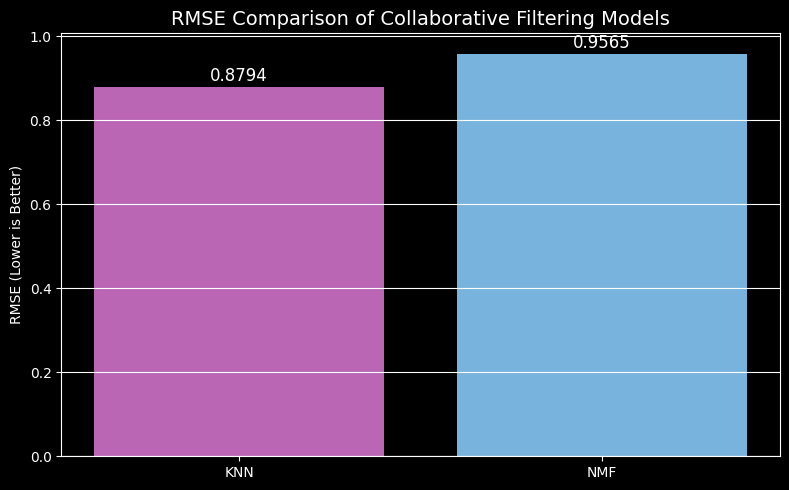

In [40]:
import matplotlib.pyplot as plt

# Fondo oscuro
plt.style.use('dark_background')

# RMSE reales
rmse_knn = 0.8794
rmse_nmf = 0.9565

# Datos del gráfico
models = ['KNN', 'NMF']
rmse_values = [rmse_knn, rmse_nmf]
colors = ['#ba66b5', '#78b3de']

# Crear el gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(models, rmse_values, color=colors)

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', va='bottom', fontsize=12)

plt.title('RMSE Comparison of Collaborative Filtering Models', fontsize=14)
plt.ylabel('RMSE (Lower is Better)')
plt.ylim(0, max(rmse_values) + 0.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Ahora vamos a generar recomendaciones personalizadas con ambos modelos (KNN y NMF) para cada usuario.

🔹 Paso 6.4: Generar recomendaciones con KNN o NMF

In [25]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # Mapear predicciones por usuario
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenar y quedarnos con top-N por usuario
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]

    return top_n

# Obtener recomendaciones para KNN
top_n_knn = get_top_n(predictions_knn, n=10)

# Obtener recomendaciones para NMF
top_n_nmf = get_top_n(predictions_nmf, n=10)

# Mostrar ejemplo de usuario
import random
random_user = random.choice(list(top_n_knn.keys()))
print(f"🔹 KNN recommendations for user {random_user}:\n", top_n_knn[random_user])
print(f"\n🔹 NMF recommendations for user {random_user}:\n", top_n_nmf[random_user])


🔹 KNN recommendations for user 575775:
 [('DS0101EN', 4.312585477529001), ('ML0101ENv3', 4.311951488666145)]

🔹 NMF recommendations for user 575775:
 [('DS0101EN', 4.339991128126408), ('ML0101ENv3', 3.9093375868753357)]


✅ Esto nos dió el top-10 recomendado para un usuario aleatorio.

## 🧠 Flowchart of Neural Network Embedding based recommender system

### ✅ Flujo de red neuronal basada en embeddings

**Input data**  
- Pares `user_id` y `item_id` (enrollments o interacciones históricas)

**Embedding layers**  
- `User Embedding Layer`: transforma cada `user_id` en un vector denso  
- `Item Embedding Layer`: transforma cada `course_id` en un vector denso

**Concatenation o interacción**  
- Se combinan ambos embeddings (concatenación, producto punto o multiplicación cruzada)

**DNN layers (opcionales)**  
- Capas densas para aprender relaciones no lineales

**Output layer**  
- Predice la probabilidad o puntuación de que el usuario interactúe con el curso

**Loss function**  
- MSE, Binary Cross-Entropy, etc., según el objetivo (regresión o clasificación)

**Training**  
- Optimización con SGD, Adam, etc.

**Top-N recommendations**  
- Para cada usuario, predecir para todos los cursos y elegir los más relevantes


🔹 Paso 1: Preparar los datos (user_id, course_id)

In [27]:
import pandas as pd


df = pd.read_csv('ratings.csv')

# Codificar los IDs como índices numéricos (necesario para embeddings)
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['user_idx'] = user_encoder.fit_transform(df['user'])
df['item_idx'] = item_encoder.fit_transform(df['item'])

# Verificar
df.head()


,user,item,rating,user_idx,item_idx
0,1889878,CC0101EN,5,31993,27
1,1342067,CL0101EN,3,23713,34
2,1990814,ML0120ENv3,5,32958,89
3,380098,BD0211EN,5,2297,18
4,779563,DS0101EN,3,11944,54


🔹 Paso 2: Crear sets de entrenamiento y validación

In [28]:
from sklearn.model_selection import train_test_split

X = df[['user_idx', 'item_idx']]
y = df['rating']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


🔹 Paso 3: Construir modelo de embeddings en Keras

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout

# Dimensiones
n_users = df['user_idx'].nunique()
n_items = df['item_idx'].nunique()
embedding_size = 50

# Inputs
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embeddings
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size)(user_input)
item_embedding = Embedding(input_dim=n_items, output_dim=embedding_size)(item_input)

# Aplanar
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenación
concat = Concatenate()([user_vec, item_vec])

# DNN
x = Dense(128, activation='relu')(concat)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)  # regresión de rating

# Modelo
model = Model([user_input, item_input], output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │  1,695,050 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │      6,300 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,722,599 (6.57 MB)

 Trainable params: 1,722,599 (6.57 MB)

 Non-trainable params: 0 (0.00 B)

🔹 Paso 4: Entrenamiento

In [30]:
# Entrenar el modelo
history = model.fit(
    [X_train['user_idx'], X_train['item_idx']],
    y_train,
    validation_data=([X_val['user_idx'], X_val['item_idx']], y_val),
    epochs=5,
    batch_size=256
)


Epoch 1/5
730/730 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 3.1073 - mae: 1.2790 - val_loss: 0.6794 - val_mae: 0.6927
Epoch 2/5
730/730 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 0.7171 - mae: 0.7262 - val_loss: 0.6838 - val_mae: 0.7019
Epoch 3/5
730/730 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.6703 - mae: 0.7020 - val_loss: 0.6915 - val_mae: 0.7080
Epoch 4/5
730/730 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.6134 - mae: 0.6671 - val_loss: 0.7237 - val_mae: 0.7310
Epoch 5/5
730/730 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.5583 - mae: 0.6307 - val_loss: 0.7382 - val_mae: 0.7377


📊 1. Gráfico de pérdida del entrenamiento.
Muestra cómo mejora (o no) el modelo en cada época.

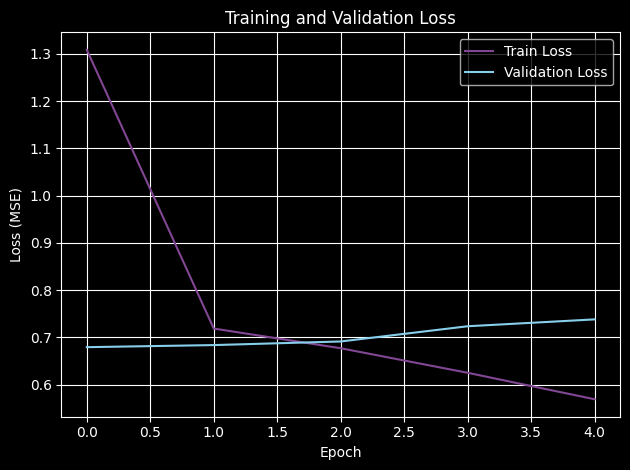

In [32]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.plot(history.history['loss'], label='Train Loss', color='#824794')
plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 Paso 5: Recomendaciones para un usuario

In [34]:
import numpy as np

# Elegir un usuario de ejemplo
user_id = df['user_idx'].sample(1).iloc[0]

# Cursos que no ha tomado
all_items = set(range(n_items))
items_taken = set(df[df['user_idx'] == user_id]['item_idx'])
items_to_predict = list(all_items - items_taken)

# Crear entrada para predicción
user_array = np.full(len(items_to_predict), user_id)
item_array = np.array(items_to_predict)

# Predecir
preds = model.predict([user_array, item_array], verbose=0)
top_indices = preds.flatten().argsort()[-10:][::-1]
recommended_courses = [item_encoder.inverse_transform([items_to_predict[i]])[0] for i in top_indices]

print(f"🔮 Top 10 recomendaciones para usuario {user_encoder.inverse_transform([user_id])[0]}:")
for course in recommended_courses:
    print("•", course)


🔮 Top 10 recomendaciones para usuario 1464472:
• LB0109ENv1
• BD0151EN
• BC0101EN
• TA0105
• RP0105EN
• ML0151EN
• BD0143EN
• DB0113EN
• SC0101EN
• DW0101EN


Entrenaremos 3 modelos distintos con Concatenate, Dot y Multiply para combinar los embeddings. Luego graficaremos sus funciones de pérdida (loss) para comparar.

🔧 Paso 1: Función que construye y entrena cada modelo

In [35]:
from tensorflow.keras.layers import Dot, Multiply

def build_and_train_model(combination='concatenate', epochs=5):
    # Inputs
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))

    # Embeddings
    user_embedding = Embedding(input_dim=n_users, output_dim=50)(user_input)
    item_embedding = Embedding(input_dim=n_items, output_dim=50)(item_input)

    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)

    # Combinación
    if combination == 'concatenate':
        x = Concatenate()([user_vec, item_vec])
    elif combination == 'dot':
        x = Dot(axes=1)([user_vec, item_vec])
    elif combination == 'multiply':
        x = Multiply()([user_vec, item_vec])
    else:
        raise ValueError("Método no válido")

    # DNN opcional solo si hay más de 1 dimensión
    if combination == 'concatenate' or combination == 'multiply':
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)

    output = Dense(1)(x)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer='adam', loss='mse')

    # Entrenar
    history = model.fit(
        [X_train['user_idx'], X_train['item_idx']],
        y_train,
        validation_data=([X_val['user_idx'], X_val['item_idx']], y_val),
        epochs=epochs,
        batch_size=256,
        verbose=0
    )
    return history


🔁 Paso 2: Entrenar los tres modelos

In [36]:
hist_concat = build_and_train_model('concatenate', epochs=5)
hist_dot = build_and_train_model('dot', epochs=5)
hist_multiply = build_and_train_model('multiply', epochs=5)


📊 Paso 3: Graficar las curvas de pérdida

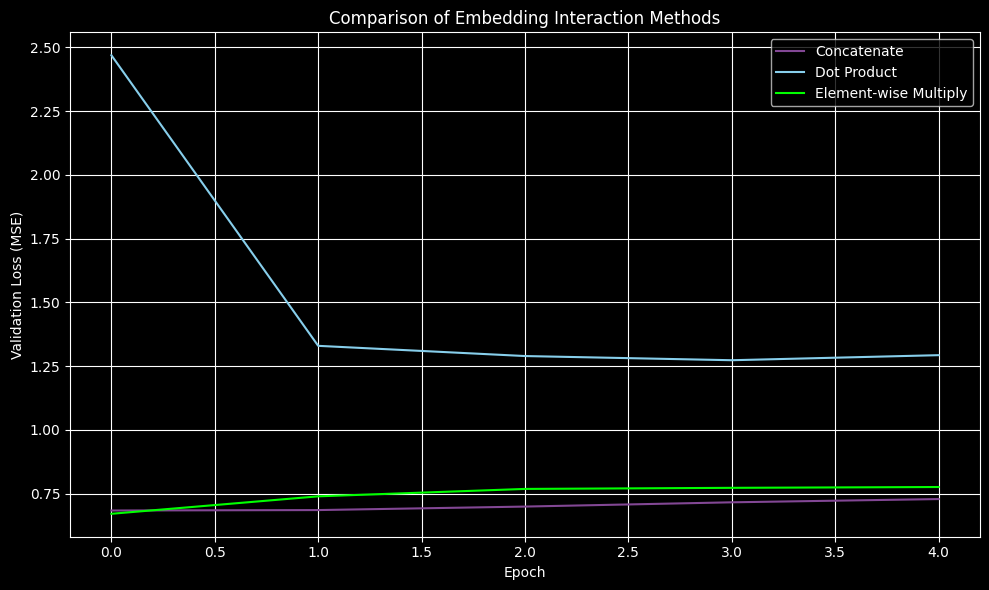

In [37]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.plot(hist_concat.history['val_loss'], label='Concatenate', color='#824794')
plt.plot(hist_dot.history['val_loss'], label='Dot Product', color='skyblue')
plt.plot(hist_multiply.history['val_loss'], label='Element-wise Multiply', color='lime')
plt.title('Comparison of Embedding Interaction Methods')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Este gráfico nos permite comparar qué combinación de embeddings rinde mejor.

### 📱 Optional: Streamlit Course Recommender App (Demo Code)

The following code shows a basic implementation of a course recommender system using **Streamlit** and a collaborative filtering model (KNN). This app allows a user to select their user ID and receive personalized course recommendations based on enrollment history.

```python
import streamlit as st
import pandas as pd
from surprise import Dataset, Reader, KNNBasic

# Load ratings data
ratings = pd.read_csv('ratings.csv')

# Prepare the model
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user', 'item', 'rating']], reader)
trainset = data.build_full_trainset()

model = KNNBasic()
model.fit(trainset)

# Sidebar UI
st.sidebar.title("Course Recommender System")
selected_user = st.sidebar.selectbox("Select User ID", ratings['user'].unique())

# Predict unseen items for selected user
all_items = trainset._raw2inner_id_items.keys()
items_taken = ratings[ratings['user'] == selected_user]['item'].unique()
items_to_predict = list(set(all_items) - set(items_taken))

predictions = [model.predict(selected_user, item) for item in items_to_predict]
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

# Display results
st.write(f"### Top 10 Recommended Courses for User {selected_user}")
st.dataframe(pd.DataFrame([(p.iid, round(p.est, 2)) for p in top_n], columns=["Course", "Predicted Rating"]))
